# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool


In [ ]:
! wget -O vwap_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' vwap_crossover.py

In [5]:
from vwap_crossover import VWAPCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 133796,
 'strategyId': 'ff0d3e0651864368bbca37c011f39bb2'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('ITC', exchange='NSE')
instrument

[{'id': 32, 'value': 'NSE:ITC'},
 {'id': 1674232, 'value': 'NSE:ITC.AF'},
 {'id': 1674277, 'value': 'NSE:ITC.BL'},
 {'id': 2552289, 'value': 'NSE:ITC.RL'},
 {'id': 243469, 'value': 'NSE:KILITCH'},
 {'id': 86929, 'value': 'NSE:KILITCH.BE'},
 {'id': 1921593, 'value': 'NSE:MITCON'},
 {'id': 1918840, 'value': 'NSE:MITCON.BE'},
 {'id': 1918841, 'value': 'NSE:MITCON.BL'},
 {'id': 1918842, 'value': 'NSE:MITCON.IQ'}]

## Setup Parameters

In [9]:
parameters = {
    'TIME_PERIOD': 7
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:ITC', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy ' VWAP Crossover ' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ VWAP Crossover            │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:ITC']               │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 15                        │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 7}        │
├─────────────────────────┼────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,ITC,2022-07-22 13:15:00+05:30,BUY,15,₹,299.80,2022-07-22 15:30:00+05:30,SELL,15,₹,301.10,19.50,19.50,0,19.50
1,NSE,ITC,2022-07-25 09:15:00+05:30,SELL,15,₹,299.00,2022-07-25 10:15:00+05:30,BUY,15,₹,301.65,-39.75,-20.25,0,-39.75
2,NSE,ITC,2022-07-25 10:15:00+05:30,BUY,15,₹,301.65,2022-07-25 11:15:00+05:30,SELL,15,₹,300.55,-16.50,-36.75,0,-16.50
3,NSE,ITC,2022-07-25 11:15:00+05:30,SELL,15,₹,300.55,2022-07-25 12:15:00+05:30,BUY,15,₹,301.15,-9.00,-45.75,0,-9.00
4,NSE,ITC,2022-07-25 12:15:00+05:30,BUY,15,₹,301.15,2022-07-25 15:15:00+05:30,SELL,15,₹,301.20,0.75,-45.00,0,0.75
5,NSE,ITC,2022-07-25 15:15:00+05:30,SELL,15,₹,301.20,2022-07-25 15:30:00+05:30,BUY,15,₹,301.20,0.00,-45.00,0,0.00
6,NSE,ITC,2022-07-26 10:15:00+05:30,BUY,15,₹,302.70,2022-07-26 11:15:00+05:30,SELL,15,₹,301.85,-12.75,-57.75,0,-12.75
7,NSE,ITC,2022-07-26 11:15:00+05:30,SELL,15,₹,301.85,2022-07-26 13:15:00+05:30,BUY,15,₹,302.00,-2.25,-60.00,0,-2.25
8,NSE,ITC,2022-07-26 13:15:00+05:30,BUY,15,₹,302.00,2022-07-26 15:30:00+05:30,SELL,15,₹,302.70,10.50,-49.50,0,10.50
9,NSE,ITC,2022-07-27 09:15:00+05:30,SELL,15,₹,302.85,2022-07-27 10:15:00+05:30,BUY,15,₹,301.75,16.50,-33.00,0,16.50


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-07-22
End Period          2023-06-30
Risk-Free Rate      0.0%
Time in Market      86.0%

Cumulative Return   -9.32%
CAGR﹪              -9.91%

Sharpe              -0.7
Prob. Sharpe Ratio  17.08%
Sortino             -0.94
Sortino/√2          -0.67
Omega               0.86

Max Drawdown        -16.68%
Longest DD Days     307

Gain/Pain Ratio     -0.18
Gain/Pain (1M)      -0.53

Payoff Ratio        1.45
Profit Factor       0.86
Common Sense Ratio  1.07
CPC Index           0.47
Tail Ratio          1.24
Outlier Win Ratio   5.24
Outlier Loss Ratio  3.06

MTD                 -1.25%
3M                  4.01%
6M                  -7.1%
YTD                 -7.18%
1Y                  -9.32%
3Y (ann.)           -9.91%
5Y (ann.)           -9.91%
10Y (ann.)          -9.91%
All-time (ann.)     -9.91%

Avg. Drawdown       -3.29%
Avg. Drawdown Days  54
Recovery Factor     -0.56
Ulcer Index         0.09
Serenity Index   

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-07-22
End Period                 2023-06-30
Risk-Free Rate             0.0%
Time in Market             86.0%

Cumulative Return          -9.32%
CAGR﹪                     -9.91%

Sharpe                     -0.7
Prob. Sharpe Ratio         17.08%
Smart Sharpe               -0.6
Sortino                    -0.94
Smart Sortino              -0.81
Sortino/√2                 -0.67
Smart Sortino/√2           -0.57
Omega                      0.86

Max Drawdown               -16.68%
Longest DD Days            307
Volatility (ann.)          7.95%
Calmar                     -0.59
Skew                       -2.58
Kurtosis                   39.31

Expected Daily %           -0.02%
Expected Monthly %         -0.81%
Expected Yearly %          -4.77%
Kelly Criterion            -6.01%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.85%
Expected Shortfall (cVaR)  -0.85%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-08-26,2023-02-22,2023-06-30,307,-16.676654,-15.693186
2,2022-07-25,2022-07-26,2022-08-03,9,-1.132559,-1.100506
3,2022-08-22,2022-08-23,2022-08-24,2,-0.860207,-0.754009
4,2022-08-04,2022-08-10,2022-08-12,7,-0.704351,-0.650991
5,2022-08-16,2022-08-18,2022-08-18,2,-0.202746,-0.138721


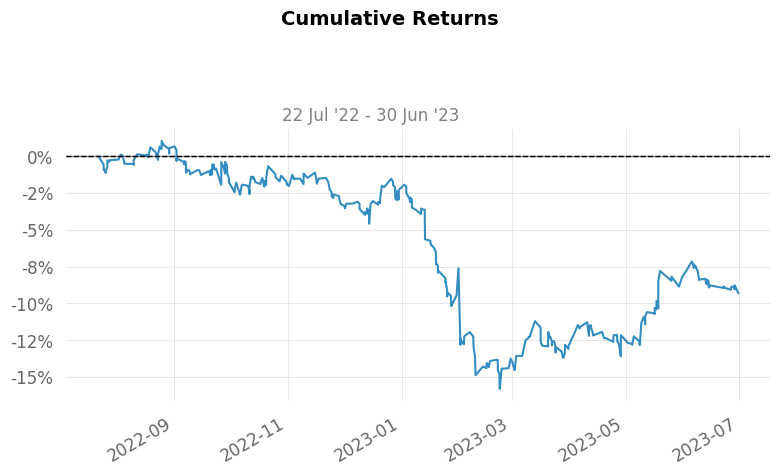

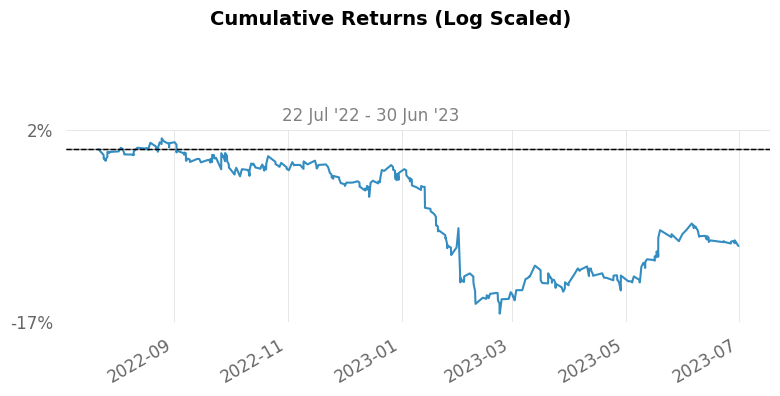

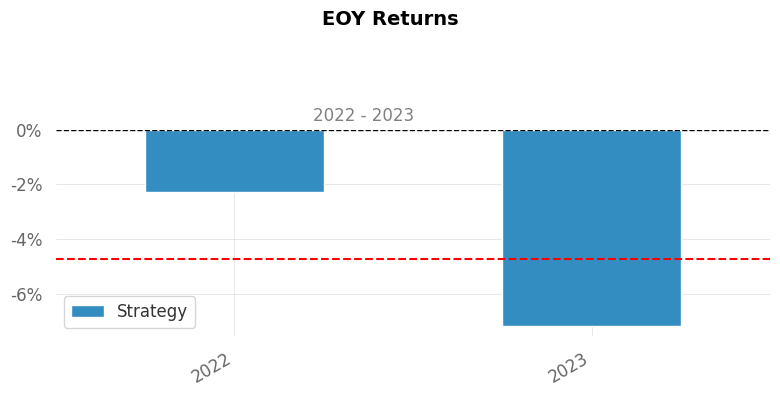

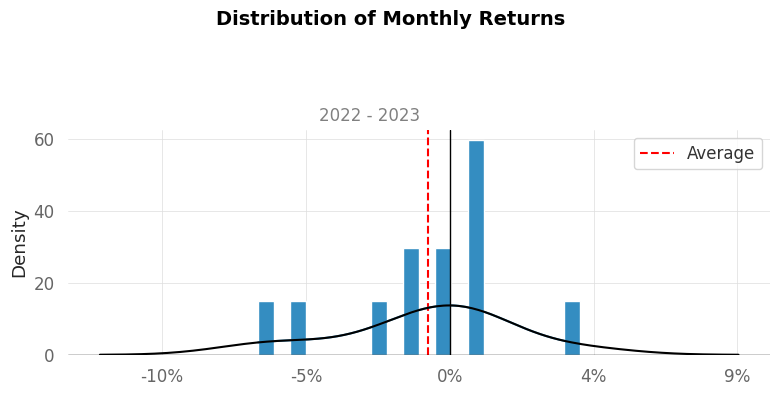

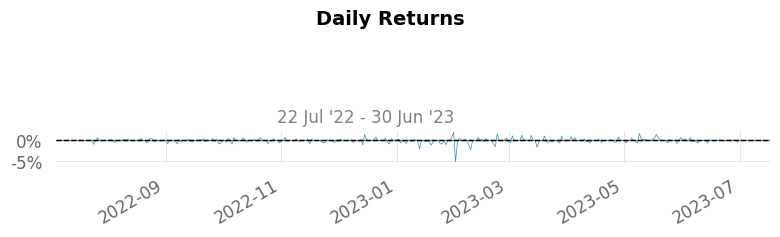

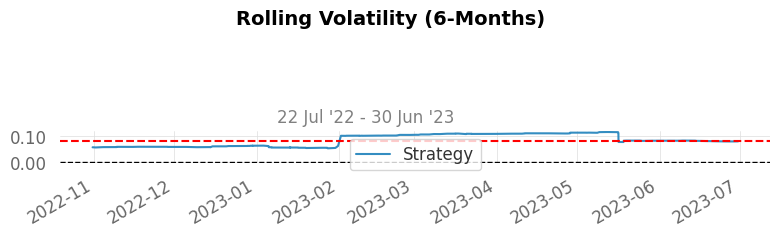

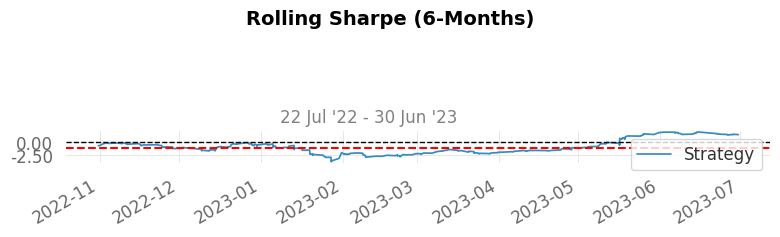

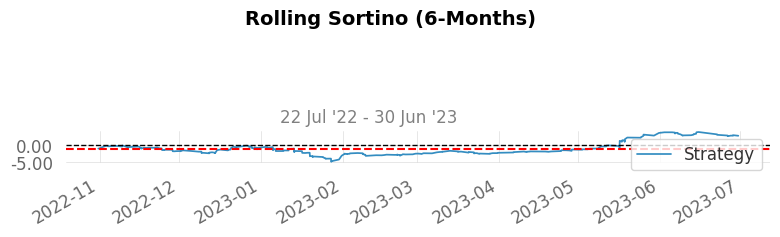

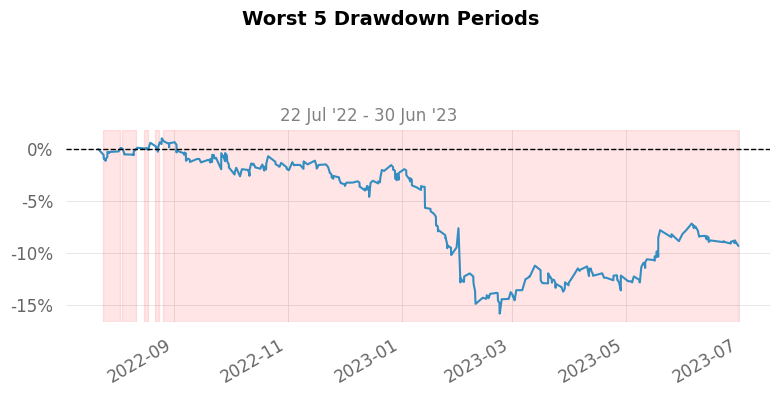

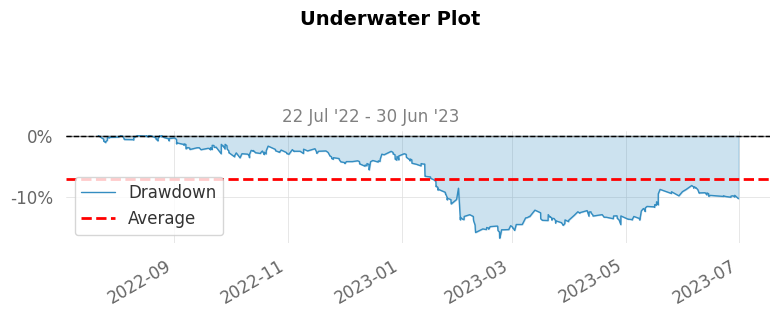

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


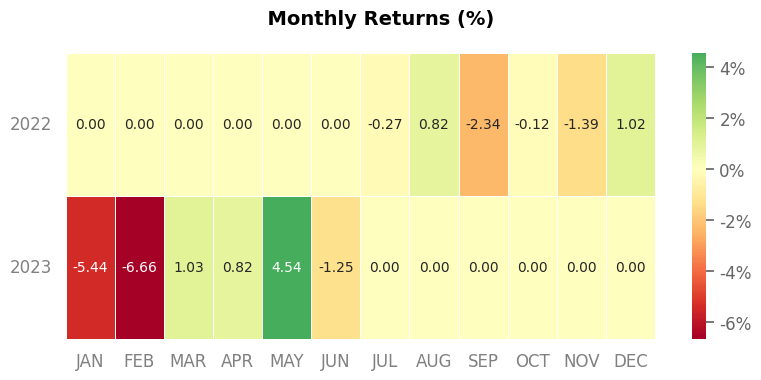

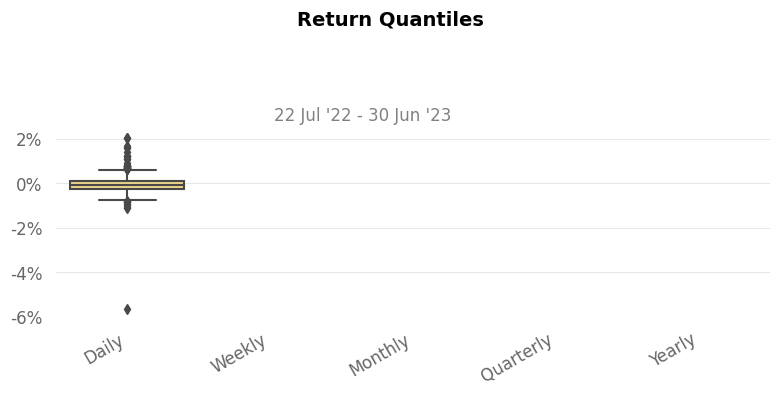

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 0637d048a7f44a318c019c2863ace799 |
| Transaction Type | BUY                              |
| Instrument       | NSE:ITC                          |
| Quantity         | 15                               |
| Price            | ₹450.45                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:01:25.455934Z | COMPLETE               |
| 2023-10-23T13:01:25.455915Z | OPEN                   |
| 2023-10-23T13:01:25.455895Z | OPEN PENDING           |
| 2023-10-23T13:01:25.455873Z | VALIDATION PENDING     |
| 2023-10-23T13:01:25.455805Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | e1a8716e551f4464a

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---